<a href="https://colab.research.google.com/github/Soichiro-Gardinner/Osc/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("All_Months.csv")
print(df.head(20))
df = df.dropna(how ="all") 

   Order ID                   Product Quantity Ordered Price Each  \
0    248151     AA Batteries (4-pack)                4       3.84   
1    248152      USB-C Charging Cable                2      11.95   
2    248153      USB-C Charging Cable                1      11.95   
3    248154          27in FHD Monitor                1     149.99   
4    248155      USB-C Charging Cable                1      11.95   
5    248156    34in Ultrawide Monitor                1     379.99   
6    248157  Lightning Charging Cable                1      14.95   
7    248158  Lightning Charging Cable                1      14.95   
8    248159           Vareebadd Phone                1      400.0   
9    248160          Wired Headphones                1      11.99   
10   248161      USB-C Charging Cable                1      11.95   
11   248162    AAA Batteries (4-pack)                3       2.99   
12   248163      USB-C Charging Cable                1      11.95   
13   248164          27in FHD Moni

In [ ]:
print(df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [ ]:
df['Quantity Ordered'] = df['Quantity Ordered'] != 'Quantity Ordered'
df['Quantity Ordered'] = df['Quantity Ordered'].astype("int32")




In [ ]:
#Months Dictionay
Month = {"01": "January",'02': "February","03":"March","04":"April","05":"May",
 "06":"June","07":"July","08":"August","09":"September","10":"October",
 "11":"November","12":"December"}

In [ ]:
#Month Column

df["Month"] = df["Order Date"].str[0:2]

df = df.dropna(how= "all")

df = df[df["Order Date"].str[0:2] != "Or"]

df["Month_Num"] = df["Month"].astype("int32")

df['Month'] = df["Month"].apply(lambda x: Month.get(x,"Nope"))

In [ ]:
print(df.head())

  Order ID                Product  Quantity Ordered Price Each  \
0   248151  AA Batteries (4-pack)                 1       3.84   
1   248152   USB-C Charging Cable                 1      11.95   
2   248153   USB-C Charging Cable                 1      11.95   
3   248154       27in FHD Monitor                 1     149.99   
4   248155   USB-C Charging Cable                 1      11.95   

       Order Date                       Purchase Address      Month  Month_Num  
0  09/17/19 14:44    380 North St, Los Angeles, CA 90001  September          9  
1  09/29/19 10:19           511 8th St, Austin, TX 73301  September          9  
2  09/16/19 17:48  151 Johnson St, Los Angeles, CA 90001  September          9  
3  09/27/19 07:52      355 Hickory St, Seattle, WA 98101  September          9  
4  09/01/19 19:03          125 5th St, Atlanta, GA 30301  September          9  


In [ ]:
#Total Sells Earnings

In [ ]:
df["Total Sells"] = df['Price Each'].astype("float32") * df['Quantity Ordered'].astype("int32") 
print(df.head(3))

  Order ID                Product  Quantity Ordered Price Each  \
0   248151  AA Batteries (4-pack)                 1       3.84   
1   248152   USB-C Charging Cable                 1      11.95   
2   248153   USB-C Charging Cable                 1      11.95   

       Order Date                       Purchase Address      Month  \
0  09/17/19 14:44    380 North St, Los Angeles, CA 90001  September   
1  09/29/19 10:19           511 8th St, Austin, TX 73301  September   
2  09/16/19 17:48  151 Johnson St, Los Angeles, CA 90001  September   

   Month_Num  Total Sells  
0          9         3.84  
1          9        11.95  
2          9        11.95  


In [ ]:
print(df.groupby("Month").sum())
print("++++++++++")
df.groupby("Month_Num").sum()

           Quantity Ordered  Month_Num   Total Sells
Month                                               
October                  20        200  3.347330e+03
September             11609     104481  2.082895e+06
++++++++++


,Quantity Ordered,Total Sells
Month_Num,,
9,11609,2.082895e+06
10,20,3.347330e+03


<BarContainer object of 11629 artists>

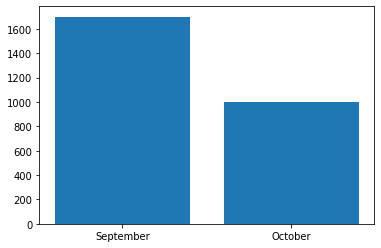

In [ ]:
plt.bar(df.Month,df["Total Sells"])

In [ ]:
df["Cities"] = df["Purchase Address"].apply(lambda x: x.split(",")[1])
print(df.head())

  Order ID                Product  Quantity Ordered Price Each  \
0   248151  AA Batteries (4-pack)                 1       3.84   
1   248152   USB-C Charging Cable                 1      11.95   
2   248153   USB-C Charging Cable                 1      11.95   
3   248154       27in FHD Monitor                 1     149.99   
4   248155   USB-C Charging Cable                 1      11.95   

       Order Date                       Purchase Address      Month  \
0  09/17/19 14:44    380 North St, Los Angeles, CA 90001  September   
1  09/29/19 10:19           511 8th St, Austin, TX 73301  September   
2  09/16/19 17:48  151 Johnson St, Los Angeles, CA 90001  September   
3  09/27/19 07:52      355 Hickory St, Seattle, WA 98101  September   
4  09/01/19 19:03          125 5th St, Atlanta, GA 30301  September   

   Month_Num  Total Sells        Cities  
0          9     3.840000   Los Angeles  
1          9    11.950000        Austin  
2          9    11.950000   Los Angeles  
3       

In [ ]:
#df["State"] = df["Purchase Address"]
#df["State"] = df["Purchase Address"].apply(lambda x : x.split(",")[2])
#print(df.State)
#df.State = df.State.apply(lambda x : x.split())

                Quantity Ordered  Month_Num    Total Sells
Cities                                                    
 Atlanta                     915       8235  169923.849077
 Austin                      666       5997  105952.809462
 Boston                     1283      11548  245551.728882
 Dallas                      935       8416  163079.019117
 Los Angeles                1884      16960  352668.548126
 New York City              1536      13827  299708.028823
 Portland                    739       6652  132194.999290
 San Francisco              2734      24613  461866.007585
 Seattle                     937       8433  155297.679187
Earnings
[169923.8490767479, 105952.80946183205, 245551.72888207436, 163079.01911711693, 352668.54812550545, 299708.02882266045, 132194.99928951263, 461866.00758481026, 155297.67918658257]
Cities
['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']


Text(0.5, 1.0, 'Earning Persentages')

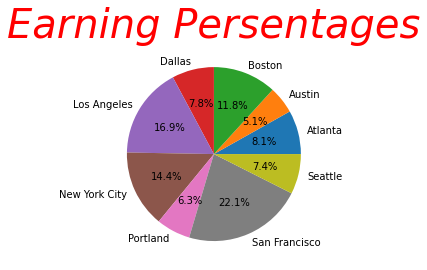

In [ ]:
#Most sels
a = df.groupby("Cities").sum()
print(a)
ass = df.groupby("Total Sells").sum()


#Earnings
print("Earnings")
aa = [i for i in a["Total Sells"]]
print(aa)
#cities
print("Cities")
x = ["Atlanta","Austin","Boston","Dallas","Los Angeles","New York City","Portland",
"San Francisco","Seattle"]
print(x)

#Pie Chart 

plt.pie(aa,labels= x,autopct='%1.1f%%')
plt.title(label= "Earning Persentages",size = 40, fontdict = {"Style" : "italic","color":"r"})

([<matplotlib.axis.XTick at 0x7fe8e5cdad10>,
 <a list of 19 Text major ticklabel objects>)

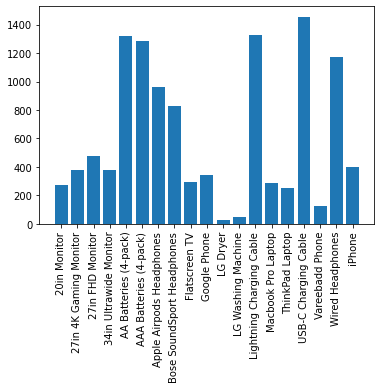

In [ ]:
W = df.groupby("Product").sum()
s = W["Quantity Ordered"]
SS = [City for City , i in df.groupby("Cities")]
P = [Product for Product , i in df.groupby("Product")]
P = P
plt.bar(P,s)

plt.xticks( P, rotation = "vertical")


In [ ]:
'''def getcity(add):
  return address.split(",")[1]'''

def get_state(add):
  return add.split(",")[2].split(" ")[1] 
df["State"] = "("+ df["Purchase Address"].apply(lambda x: get_state(x)) +")"

print(df.head(10))

  Order ID                   Product  Quantity Ordered Price Each  \
0   248151     AA Batteries (4-pack)                 1       3.84   
1   248152      USB-C Charging Cable                 1      11.95   
2   248153      USB-C Charging Cable                 1      11.95   
3   248154          27in FHD Monitor                 1     149.99   
4   248155      USB-C Charging Cable                 1      11.95   
5   248156    34in Ultrawide Monitor                 1     379.99   
6   248157  Lightning Charging Cable                 1      14.95   
7   248158  Lightning Charging Cable                 1      14.95   
8   248159           Vareebadd Phone                 1      400.0   
9   248160          Wired Headphones                 1      11.99   

       Order Date                        Purchase Address      Month  \
0  09/17/19 14:44     380 North St, Los Angeles, CA 90001  September   
1  09/29/19 10:19            511 8th St, Austin, TX 73301  September   
2  09/16/19 17:48   151 

Text(0, 0.5, 'sells')

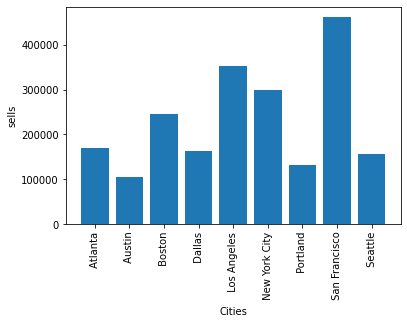

In [ ]:
cities = [i for i, o in df.groupby("Cities")]
plt.bar(cities,aa)
plt.xticks(cities, rotation ="vertical")
plt.xlabel("Cities")
#plt.yticks(aa)
plt.ylabel("sells")

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute
print(df.head(20))

   Order ID                   Product  Quantity Ordered Price Each  \
0    248151     AA Batteries (4-pack)                 1       3.84   
1    248152      USB-C Charging Cable                 1      11.95   
2    248153      USB-C Charging Cable                 1      11.95   
3    248154          27in FHD Monitor                 1     149.99   
4    248155      USB-C Charging Cable                 1      11.95   
5    248156    34in Ultrawide Monitor                 1     379.99   
6    248157  Lightning Charging Cable                 1      14.95   
7    248158  Lightning Charging Cable                 1      14.95   
8    248159           Vareebadd Phone                 1      400.0   
9    248160          Wired Headphones                 1      11.99   
10   248161      USB-C Charging Cable                 1      11.95   
11   248162    AAA Batteries (4-pack)                 1       2.99   
12   248163      USB-C Charging Cable                 1      11.95   
13   248164         

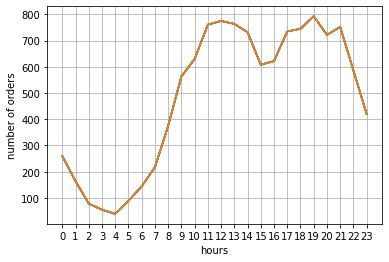

In [ ]:
hours = [hour for hour, i in df.groupby("Hour")]
plt.plot(hours , df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("hours")
plt.ylabel("number of orders")
plt.grid()
plt.show()

In [ ]:
Q =df.groupby("Hour").count()
print(Q)

      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0          260      260               260         260         260   
1          164      164               164         164         164   
2           78       78                78          78          78   
3           55       55                55          55          55   
4           39       39                39          39          39   
5           89       89                89          89          89   
6          144      144               144         144         144   
7          217      217               217         217         217   
8          375      375               375         375         375   
9          563      563               563         563         563   
10         630      630               630         630         630   
11         761      761               761         761         761   
12         775      775           

In [ ]:
Af = df[df["Order ID"].duplicated(keep = False )]
Af["Grouped"] = Af.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
Af = Af[["Order ID", "Grouped"]].drop_duplicates()
print(Af.head(20))

    Order ID                                            Grouped
20    248171          USB-C Charging Cable,USB-C Charging Cable
60    248210                    iPhone,Lightning Charging Cable
70    248219            Bose SoundSport Headphones,Google Phone
117   248265         Vareebadd Phone,Bose SoundSport Headphones
176   248323            Google Phone,Bose SoundSport Headphones
183   248329                   Vareebadd Phone,Wired Headphones
186   248331  iPhone,Lightning Charging Cable,Apple Airpods ...
239   248381  Bose SoundSport Headphones,34in Ultrawide Monitor
266   248407  iPhone,Lightning Charging Cable,Apple Airpods ...
291   248430  Apple Airpods Headphones,Lightning Charging Cable
393   248531            Google Phone,Bose SoundSport Headphones
455   248592       27in 4K Gaming Monitor,AA Batteries (4-pack)
480   248616                    iPhone,Apple Airpods Headphones
544   248679               Vareebadd Phone,USB-C Charging Cable
594   248727  Apple Airpods Headphones,L

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Checking the most common product
from itertools import combinations
from collections import Counter

count = Counter()
for row in Af["Grouped"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list, 2)))

#print(count.most_common(10))

for key, value in count.most_common(10):
  print(key,value)

('iPhone', 'Lightning Charging Cable') 61
('Google Phone', 'USB-C Charging Cable') 60
('iPhone', 'Wired Headphones') 27
('Vareebadd Phone', 'USB-C Charging Cable') 22
('iPhone', 'Apple Airpods Headphones') 18
('Google Phone', 'Wired Headphones') 17
('Google Phone', 'Bose SoundSport Headphones') 11
('Lightning Charging Cable', 'Wired Headphones') 8
('Vareebadd Phone', 'Wired Headphones') 6
('USB-C Charging Cable', 'Wired Headphones') 6


In [ ]:
price = [i for i , o in df.groupby("Product")]
print(price)


['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']
